In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import random

In [11]:
def run_simulation(predicate_func, bounds, num_samples):
    x = np.random.uniform(bounds[0], bounds[1], num_samples)
    y = np.random.uniform(bounds[2], bounds[3], num_samples)
    logical_mask = predicate_func(x, y)
    count = np.sum(logical_mask)
    area = (bounds[1] - bounds[0]) * (bounds[3] - bounds[2])
    return area * (count / num_samples)

In [12]:
def circle(x,y):
    return x**2 + y**2 <= 1

def parabola(x,y):
    return y <= x**2

def gaussian(x,y):
    return y <= np.exp(-x**2)

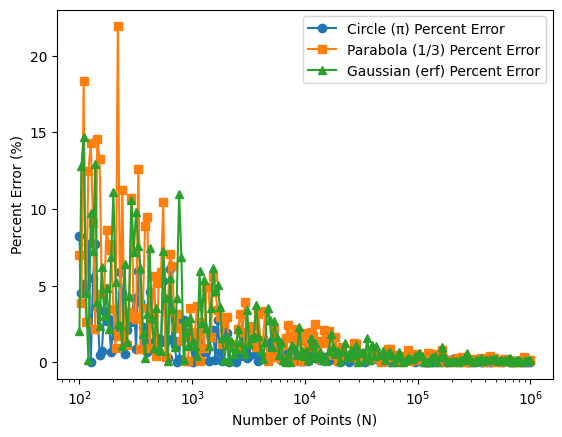

In [13]:
N_values = np.logspace(2, 6, num=200, dtype=int)

pi_estimates = [run_simulation(circle, [-1, 1, -1, 1], n) for n in N_values]
one_third_estimates = [run_simulation(parabola, [0, 1, 0, 1], n) for n in N_values]
gaussian_estimates = [run_simulation(gaussian, [0, 2, 0, 1], n) for n in N_values]

pi_error = [abs((est - math.pi) / math.pi) * 100 for est in pi_estimates]
one_third_error = [abs((est - (1/3)) / (1/3)) * 100 for est in one_third_estimates]

true_gaussian_value = (np.sqrt(np.pi) / 2) * scipy.special.erf(2)
gaussian_error = [
    abs(est - true_gaussian_value) / true_gaussian_value * 100
    for est in gaussian_estimates
]

plt.plot(N_values, pi_error, marker='o', linestyle='-', label='Circle (π) Percent Error')
plt.plot(N_values, one_third_error, marker='s', linestyle='-', label='Parabola (1/3) Percent Error')
plt.plot(N_values, gaussian_error, marker='^', linestyle='-', label='Gaussian (erf) Percent Error')
plt.xscale('log')
plt.xlabel('Number of Points (N)')
plt.ylabel('Percent Error (%)')
plt.legend()

plt.show()